# Demo kernel PCA

Adapted by <alberto.suarez@uam.es>  from

[Kernel PCA (sklearn)](https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py)   
Authors: Mathieu Blondel, Andreas Mueller
          
License: [BSD 3 clause](https://opensource.org/licenses/BSD-3-Clause)	
 


In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation  import FuncAnimation
from sklearn.decomposition import PCA, KernelPCA
from sklearn import datasets
import kernel_machine_learning as kpca

In [2]:
# Input data

np.random.seed(0) # for reproductible results
# X, y = datasets.make_circles(n_samples=400, factor=.3, noise=.05)
X, y = datasets.make_moons(n_samples=400, noise=.05)


In [3]:
# Principal components

# PCA (linear)

X_pca, eigenvals_pca, eigenvecs_pca = kpca.kernel_pca(X, X, kpca.linear_kernel)

# Kernel PCA

A = 1.0
gamma = 20.0
L = np.sqrt(0.5 / gamma)
def rbf_kernel (X, X_prime):
    return kpca.rbf_kernel(X, X_prime, A, L)

X_kpca, eigenvals_kpca, eigenvecs_kpca = kpca.kernel_pca(X, X, rbf_kernel)

# PCA (sklearn)
pca = PCA()
X_pca_sk = pca.fit_transform(X)

# Kernel PCA (sklearn)

kernel_pca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=gamma)
X_kpca_sk = kernel_pca.fit_transform(X)
X_back = kernel_pca.inverse_transform(X_kpca_sk)

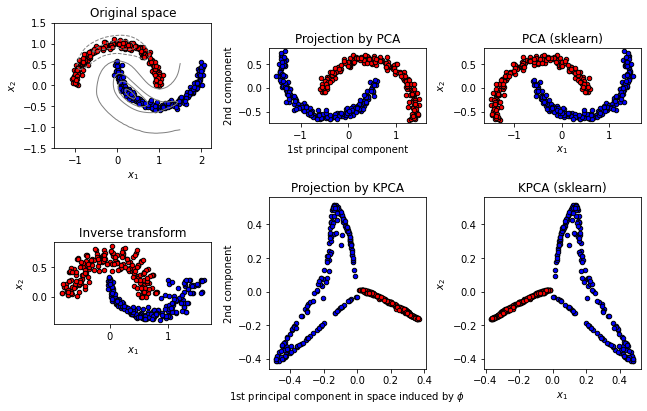

In [4]:
# Plot results

plt.figure(figsize=(9,6))
plt.subplot(2, 3, 1, aspect='equal')
plt.title('Original space')
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c='red',
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c='blue',
            s=20, edgecolor='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

# projection on the first principal component (in the phi space)
Z_grid = kernel_pca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')


plt.subplot(2, 3, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


plt.subplot(2, 3, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 3, 5, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 3, 3, aspect='equal')
plt.scatter(X_pca_sk[reds, 0], X_pca_sk[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca_sk[blues, 0], X_pca_sk[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("PCA (sklearn)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


plt.subplot(2, 3, 6, aspect='equal')
plt.scatter(X_kpca_sk[reds, 0], X_kpca_sk[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca_sk[blues, 0], X_kpca_sk[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("KPCA (sklearn)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

## Exercises
1. Implement the function **kernel_pca** del fichero *kernel_machine_learning.py*.
2. Why do the projections onto the first two KPCA principal components look different for the sklearn and our implementation? Is any of the two incorrect?
 
As we see they have exactly the same structure but they are flipped. 
This is due to the fact that the eigenvectors solutions can be $\alpha$ or $- \alpha$ and
the choice determine the orientation. 
All in all, both implementations are correct.  

3. Vary the parameters of the kernel and comment on the behavior of the projections onto the first two KPCA components for the different values considered (e.g. $\gamma \in \left\{0.02, 0.2, 2.0, 20.0, 200.0, 2000.0\right\}$). 


Gamma behaviours for RBF kernel:


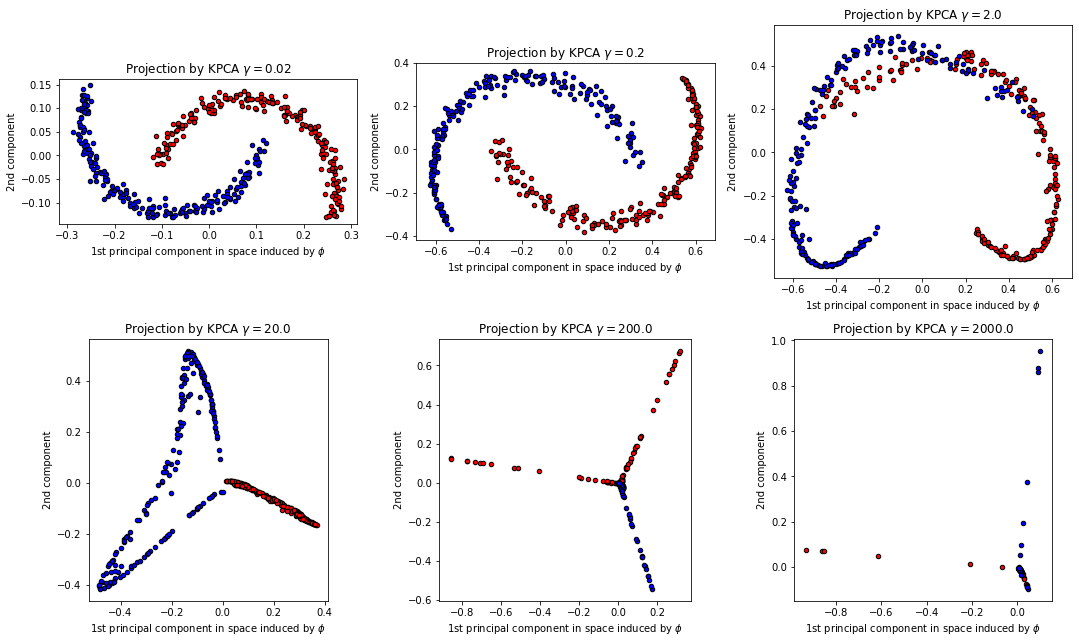

In [5]:
# Kernel PCA
# Hyperparameters
gammas_values = [0.02, 0.2, 2.0, 20.0, 200.0, 2000.0]
A = 1.0
len_gamma_values = len(gammas_values)
number_of_columns = int(np.ceil(len_gamma_values/2))
# Plot configuration
plt.figure(figsize=(15,9))
plt.subplot(2, number_of_columns, 1, aspect='equal')
title = 'Gamma behaviours for RBF kernel:'
print(title)
plt.title(title)
reds = y == 0
blues = y == 1
plot_counter = 1

for gamma in gammas_values:
    # RBF built
    L = np.sqrt(0.5 / gamma)
    def rbf_kernel (X, X_prime):
        return kpca.rbf_kernel(X, X_prime, A, L)
    
    # Compute projections
    X_kpca, eigenvals_kpca, eigenvecs_kpca = kpca.kernel_pca(X, X, rbf_kernel)

    # Plotting
    plt.subplot(2, number_of_columns, plot_counter, aspect='equal')
    plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
                s=20, edgecolor='k')
    plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
                s=20, edgecolor='k')
    plt.title(fr"Projection by KPCA $\gamma=${gamma}")
    plt.xlabel(r"1st principal component in space induced by $\phi$")
    plt.ylabel("2nd component")
    plot_counter += 1
    
plt.tight_layout()
plt.show()



 In particular,
    1. What is the behaviour in the limit in which the width of the kernel approaches $\infty$. Explain why one should expect such behavior.
    2. What is the behaviour in the limit in which the width of the kernel approaches $0$. Explain why one should expect such behavior.

Intuitively, the RBF kernel acts as a filter to determine which points should be projected together: the bigger its value, closer should be two points in order to be projected near.  
Formally, it is defined as: 
$$
k_{\gamma, A}(x,y) = A e^{- \gamma \|x - y\|^2},
$$
so that, apart from the distance, the bigger is $\gamma$ the closer two points should be in order to be projected together.

Mathematically: 
$$
\lim_{\gamma \rightarrow \infty} k_{\gamma, A}(x,y) = A \delta(x,y) = A Id_n. 
$$

The previous observation explain the behaviour of the plotted graph:
when the width of the kernel approaches to infinity all the points would be projected together in a point. Otherwise, if the limit of the width approaches $0$,  the projection would not be sensitive to the distances and all would concentrate in a point.

$$
\lim_{\gamma \rightarrow 0} k_{\gamma, A}(x,y) = A (1)_{{(i,j)}_{1 \leq i,j \leq n}}. 
$$

We will denote the matrix $(1)_{{(i,j)}_{1 \leq i,j \leq n}}$ as $1$ ($n \times n$ matrix which entries are 1s). 


In [10]:
A = 1
for gamma in [1e-10, 9e10]:
    L = np.sqrt(0.5 / gamma)
    X_proof = [[1,1], [2,1]]
    print(f'For gamma = {gamma} K = ')
    print(kpca.rbf_kernel(X_proof, X_proof, A, L))


For gamma = 1e-10 K = 
[[1. 1.]
 [1. 1.]]
For gamma = 90000000000.0 K = 
[[1. 0.]
 [0. 1.]]


If we compute the centered kernel: 

**For  $ \gamma \rightarrow \infty$ then K $\rightarrow Id_n$**

\begin{align}
\tilde{K} 
&=
K - \frac{1}{N}K 1 -  \frac{1}{N} 1'K +  \frac{1}{N^2} 1 K 1
\\
&=
K - \frac{1}{N}K 1 -  \frac{1}{N} K 1 +  \frac{1}{N^2} 1 K 1
\\
&=
I - \frac{2}{N}I 1 + \frac{1}{N^2} 1 I 1
\\
&=
I - \frac{2}{N}I 1 + \frac{N}{N^2} I 1
\\
&=
I - \frac{1}{N}1. 
\end{align}

if $N$ is large enough the projections would remain equally. 

**For  $ \gamma \rightarrow 0$ then K $\rightarrow 1$**

Firstly note that 

$$
1^2 = N 1
$$
and by induction 

$$
1^p = N^{p-1}1.
$$

\begin{align}
\tilde{K} 
&=
K - \frac{1}{N}K 1 -  \frac{1}{N} 1'K +  \frac{1}{N^2} 1 K 1
\\
&=
1 - \frac{2}{N}N 1 + \frac{1}{N^2}N^2 1
\\
&=
0.
\end{align}

So the projection should be a point. 

1. (Extra point) Make an animation that shows the evolution of the projections onto the first two KPCA components with $ 0.002 < \gamma < 20000.0$. 

TypeError: cannot unpack non-iterable AxesSubplot object

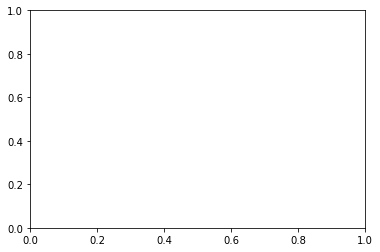

In [6]:

from IPython import display

n_frames = 10000

# Creating a plot
gammas_list  = np.linspace(0.002, 20000, n_frames)

#Figure = plt.figure()
#ax = plt.axes()

fig, ax = plt.subplot()
data_fig = ax.plot([])

# Creating a plot
gammas_list  = np.linspace(0.002, 20000, n_frames)

# Binary classification
reds = y == 0
blues = y == 1

def animation_function(frame):
    gamma = gammas_list[frame]
    # RBF built
    L = np.sqrt(0.5 / gamma)
    A = 1.0
    def custom_rbf_kernel (X, X_prime):
        return kpca.rbf_kernel(X, X_prime, A, L)
    
    # Compute projections
    X_kpca, _, _ = kpca.kernel_pca(X, X, custom_rbf_kernel)

    ax.clear()
    ax.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
    ax.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
                s=20, edgecolor='k')
    ax.text(0.5, 1.100,f"Projection by KPCA $\gamma=${gamma}")
    return ax
    
animation = FuncAnimation(Figure, animation_function, frames = n_frames)
animation.show()
display.HTML(animation.to_jshtml())


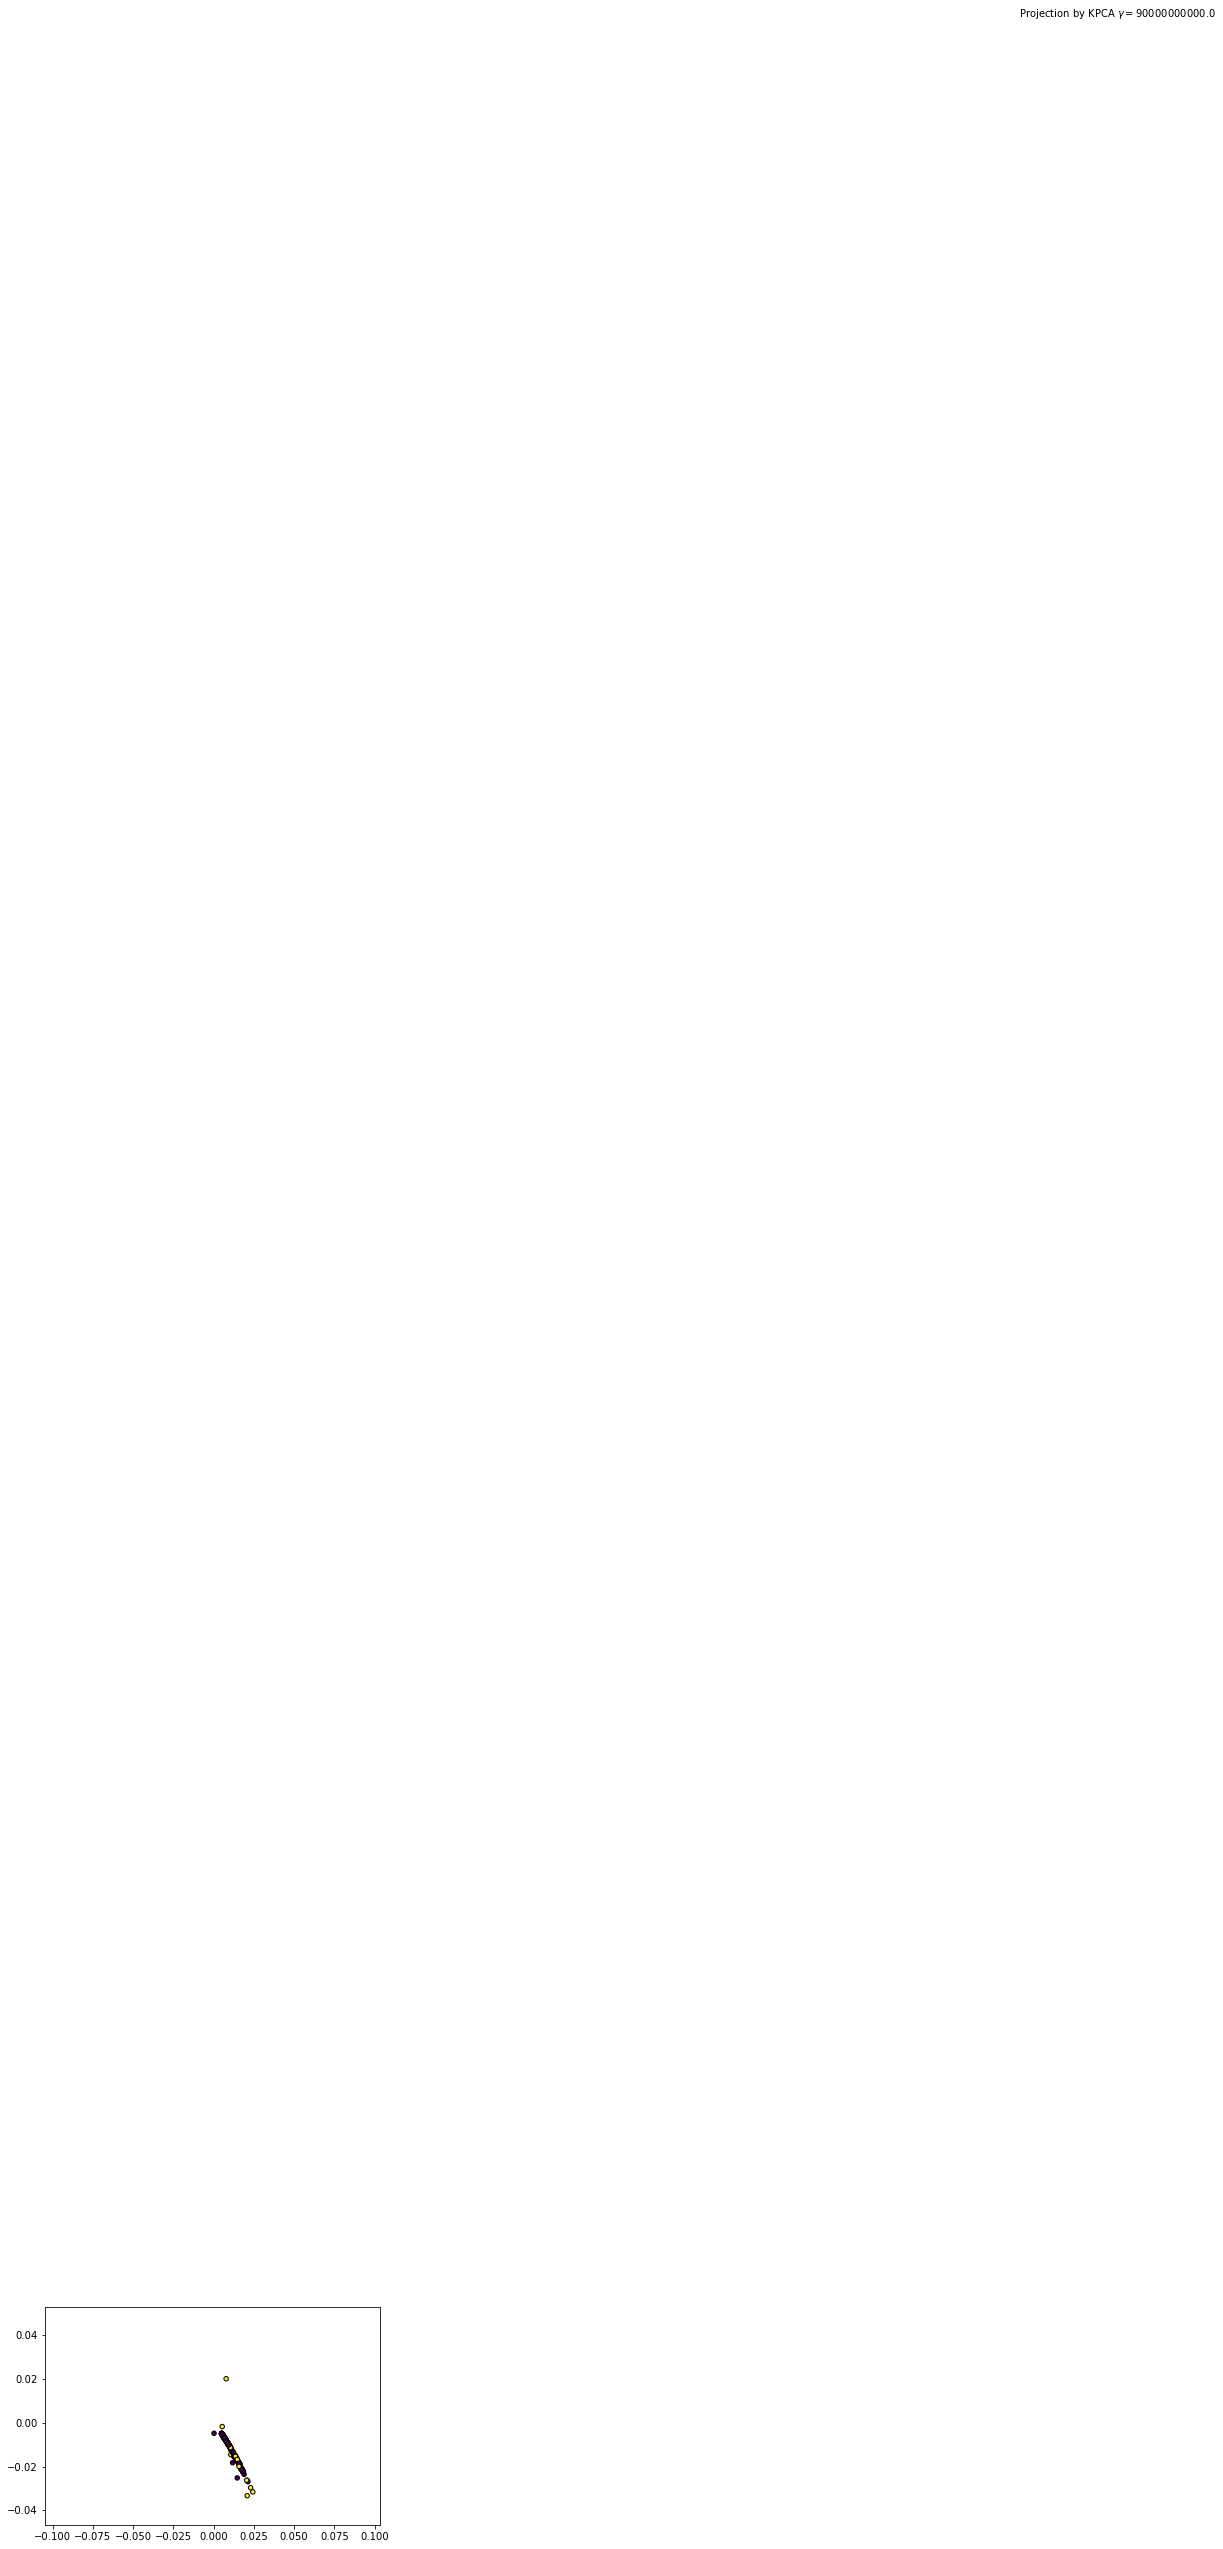

In [26]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML


class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, X, y):
        frames = 24*6
        self.gammas_values =  np.linspace(0.2, 2000, frames)
        #[0.02, 0.2, 2.0, 20.0, 200.0, 2000.0]
        self.X = X
        self.y = y
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval= 1000/10,  # 10 frames por segundo
                                          init_func=self.setup_plot, blit=True)
        
    # Binary classification
    def get_X_kpca(self, gamma):
        # RBF built
        L = np.sqrt(0.5 / gamma)
        A = 1.0
        def custom_rbf_kernel (X, X_prime):
            return kpca.rbf_kernel(X, X_prime, A, L)
        
        # Compute projections
        X_kpca, _, _ = kpca.kernel_pca(self.X, self.X, custom_rbf_kernel)
        return X_kpca

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        X_kpca = self.get_X_kpca(0.002)
        self.ax.clear()
        self.ax.text(0.5, 1.100,f"Projection by KPCA $\gamma=${gamma}")
        self.scat = self.ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c=self.y,
        s=20, edgecolor='k')

        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""

        while True:
            for gamma in self.gammas_values:
                yield self.get_X_kpca(gamma)

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data)
        # Set colors..
        self.scat.set_array(self.y)

        return self.scat,


a = AnimatedScatter(X, y)

HTML(a.ani.to_jshtml())
